# Classifying A dataset with 90483 images of fruits and vegetables using ResNets, Regularization and Data Augmentation in PyTorch.

The following fruits and are included:
Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Corn (with husk), Cucumber (ripened), Dates, Eggplant, Fig, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Stone, Williams), Pepper (Red, Green, Orange, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow, not ripened, Heart), Walnut, Watermelon.

---



##### In this project, I will use the following techniques to train the model to achieve more than 99 percent accuracy in classifying images from datasets.

*   Data normalization
*   Data augmentation
*   Batch normalization
*   Learning rate scheduling
*   Residual connections
*   Weight Decay
*   Gradient clipping
*   Adam optimizer













In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1_86cJr2esQI4rCAZOqKoJhtEB-qTAdsg')

     |████████████████████████████████| 71kB 5.4MB/s 


In [58]:
!pip install jovian --upgrade --quiet

In [3]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Preparing the Fruits Dataset

Download the dataset from Kaggle and unzip it.

In [4]:
!mkdir ../root/.kaggle
!echo '{"username":"shakilanwar","key":"f549170576bf14032453b5cf6428ada7"}' > ../root/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits
!ls
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

In [5]:
project_name = 'fruits-and-vegetable-classifaction'

There are 131 type fruits in the training set.

In [6]:
data_dir = './fruits-360/Training'
classes = os.listdir(data_dir)
print(classes)
print('Number of fruits in the training dataset:', len(classes))

['Tangelo', 'Pomelo Sweetie', 'Cherry Wax Yellow', 'Onion Red', 'Tomato Yellow', 'Corn', 'Strawberry', 'Apple Granny Smith', 'Fig', 'Grape White 4', 'Grape White 3', 'Banana', 'Pepper Green', 'Corn Husk', 'Grape Pink', 'Apricot', 'Grape Blue', 'Cucumber Ripe', 'Chestnut', 'Avocado ripe', 'Melon Piel de Sapo', 'Plum', 'Tomato Cherry Red', 'Passion Fruit', 'Nectarine Flat', 'Clementine', 'Cherry 1', 'Apple Red Yellow 2', 'Mango Red', 'Granadilla', 'Pepper Yellow', 'Mango', 'Pepper Orange', 'Guava', 'Grapefruit Pink', 'Quince', 'Peach', 'Pepper Red', 'Pear Kaiser', 'Rambutan', 'Pear Red', 'Eggplant', 'Strawberry Wedge', 'Cactus fruit', 'Mangostan', 'Grape White 2', 'Cauliflower', 'Cantaloupe 1', 'Onion White', 'Cocos', 'Dates', 'Plum 2', 'Limes', 'Blueberry', 'Mandarine', 'Peach 2', 'Nectarine', 'Tomato 3', 'Papaya', 'Apple Red Delicious', 'Kiwi', 'Grapefruit White', 'Tomato 2', 'Pear Stone', 'Banana Red', 'Peach Flat', 'Pear Monster', 'Pepino', 'Walnut', 'Potato White', 'Apple Red Yellow

In [7]:
apple_breaburn_training_files = os.listdir(data_dir + "/Apple Braeburn")
print('No. of training examples for apple breaburn are:', len(apple_breaburn_training_files))
print(apple_breaburn_training_files[:5])

No. of training examples for apple breaburn are: 492
['r_220_100.jpg', 'r_139_100.jpg', '320_100.jpg', 'r_308_100.jpg', 'r_187_100.jpg']


In [8]:
apple_breaburn_test_files = os.listdir("./fruits-360/Test/Apple Braeburn")
print('No. of testing examples for apple breaburn are:', len(apple_breaburn_test_files))
print(apple_breaburn_test_files[:5])

No. of testing examples for apple breaburn are: 164
['67_100.jpg', 'r_70_100.jpg', 'r_51_100.jpg', '60_100.jpg', '41_100.jpg']


In [9]:
dataset = ImageFolder(data_dir[0], transform=ToTensor())

In [10]:
img, label = dataset[0]
print('Shape of image:', img.shape, label)

Shape of image: torch.Size([3, 100, 100]) 1


The shape of the each image is 100 x 100 pixels. 

In [11]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  fruits-360 (1)


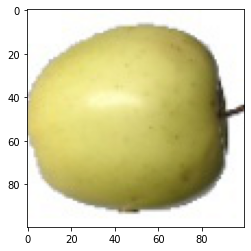

In [12]:
show_example(*dataset[585])

In [13]:
# stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
stats = ((0.4300, 0.4571, 0.4533), (0.2581, 0.2581, 0.2886))
train_tfms = tt.Compose([tt.Resize((64, 64)),
                         tt.CenterCrop(64),
                         tt.RandomCrop(64, padding = 4, padding_mode = 'reflect'),
                         tt.RandomHorizontalFlip(),
                        #  tt.RandomRotation([-15, 15]),
                         tt.ToTensor(),
                         tt.Normalize(*stats, inplace = True)])
valid_tfms = tt.Compose([tt.Resize((64, 64)) ,tt.ToTensor(), tt.Normalize(*stats)])

In [14]:
train_ds = ImageFolder('./fruits-360/Training', train_tfms)
valid_ds = ImageFolder('./fruits-360/Test', valid_tfms)

In [15]:
batch_size = 100

In [16]:
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 3, pin_memory = True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers = 3, pin_memory = True)

In [17]:
def denormalize(images, means, stds):
  means = torch.tensor(means).reshape(1, 3, 1, 1)
  stds = torch.tensor(stds).reshape(1, 3, 1, 1)
  return images * stds + means

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize =(12, 12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images[:64], nrow = 8).permute(1, 2, 0).clamp(0, 1))
    break

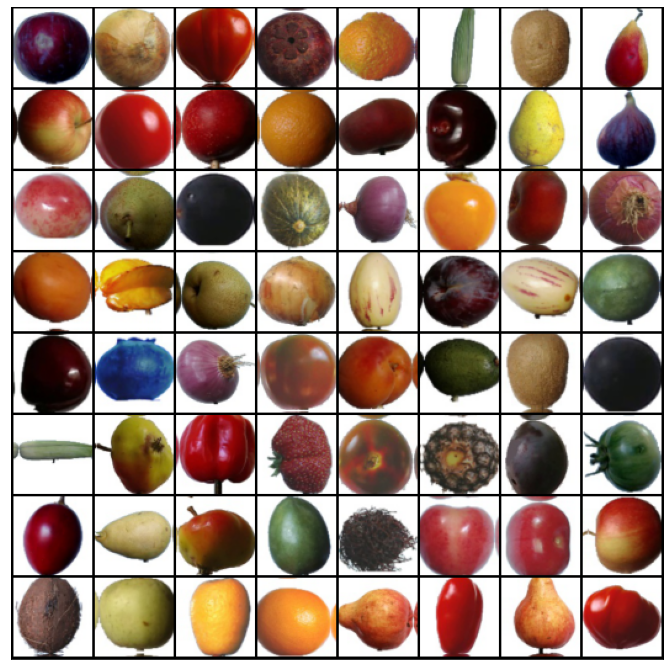

In [18]:
show_batch(train_dl)

##Using the GPU

In [19]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

In [20]:
device = get_default_device()
device

device(type='cuda')

In [21]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Model with Residual Blocks and Batch Normalization

In [22]:
class SimpleResiduleBlock(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, stride = 1, padding = 1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, stride = 1, padding = 1)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)
    return self.relu2(out) + x

In [23]:
simple_resnet = to_device(SimpleResiduleBlock(), device)

for images, labels in train_dl:
  out = simple_resnet(images)
  print(out.shape)
  break

del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([100, 3, 64, 64])


In [24]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImagesClassificationBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print('Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(
        epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [25]:
def conv_block(in_channels, out_channels, pool = False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace = True)]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class ResNet9(ImagesClassificationBase):
  def __init__(self, in_channels, num_classes):
    super().__init__()

    self.conv1 = conv_block(in_channels, 64)      # 64 * 50 * 50
    self.conv2 = conv_block(64, 128, pool = True) # 128 * 25 * 25
    self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))   # 128 * 16 * 16

    self.conv3 = conv_block(128, 256, pool = True)    # 256 * 12 * 12
    self.conv4 = conv_block(256, 512, pool = True)    # 512 * 6 * 6
    self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
    
    self.classifier = nn.Sequential(nn.MaxPool2d(6),
                                    nn.Flatten(),
                                    nn.Dropout(0.2),
                                    nn.Linear(512, num_classes))
    
  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out = self.res1(out) + out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.res2(out) + out
    out = self.classifier(out)
    return out

In [26]:
model = to_device(ResNet9(3, 131), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Training the Model

In [27]:
@torch.no_grad()
def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay = 0, grad_clip = None, opt_func = torch.optim.SGD):
  torch.cuda.empty_cache()
  history = []

  optimizer = opt_func(model.parameters(), max_lr, weight_decay = weight_decay)

  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs = epochs, 
                                              steps_per_epoch = len(train_loader))

  for epoch in range(epochs):
    model.train()
    train_losses = []
    lrs = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()

      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(), grad_clip)

      optimizer.step()  
      optimizer.zero_grad()

      lrs.append(get_lr(optimizer))
      sched.step()

    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    result['lrs'] = lrs
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [28]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.013377192430198193, 'val_loss': 4.877734661102295}]

In [29]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [30]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00395, train_loss: 0.6094, val_loss: 0.9225, val_acc: 0.7674
Epoch [1], last_lr: 0.00936, train_loss: 0.2118, val_loss: 0.2482, val_acc: 0.9321
Epoch [2], last_lr: 0.00972, train_loss: 0.1249, val_loss: 0.1427, val_acc: 0.9671
Epoch [3], last_lr: 0.00812, train_loss: 0.0861, val_loss: 0.1365, val_acc: 0.9560
Epoch [4], last_lr: 0.00556, train_loss: 0.0674, val_loss: 0.0729, val_acc: 0.9788
Epoch [5], last_lr: 0.00283, train_loss: 0.0292, val_loss: 0.0433, val_acc: 0.9912
Epoch [6], last_lr: 0.00077, train_loss: 0.0102, val_loss: 0.0376, val_acc: 0.9939
Epoch [7], last_lr: 0.00000, train_loss: 0.0023, val_loss: 0.0305, val_acc: 0.9949
CPU times: user 9min 13s, sys: 7min 5s, total: 16min 18s
Wall time: 17min 41s


In [49]:
train_time = '17.41'

My model trained to over 99% accuracy in under 18 minutes! 

The validation set accuracies plot is shown blow.

In [32]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

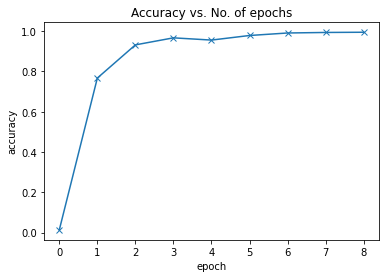

In [33]:
plot_accuracies(history)

The validation and training loss are shown in same plot to understand the tread of the model. 

In [34]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

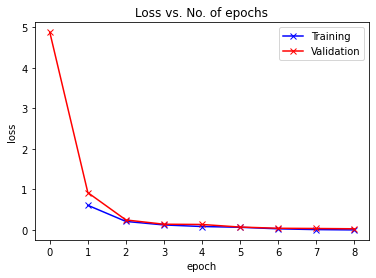

In [35]:
plot_losses(history)

The losses of validation and training sets are allmost same after 8 epoch.

Visualize the trend of learning rate changed over time, batch-by-batch all the epochs. 

In [36]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

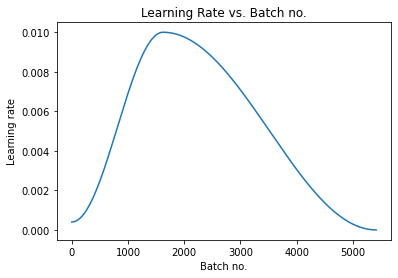

In [37]:
plot_lrs(history)

## Testing with individual images

In [38]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


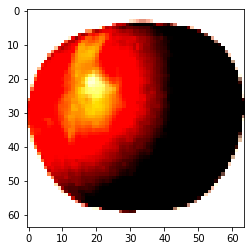

In [39]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Banana Red , Predicted: Banana Red


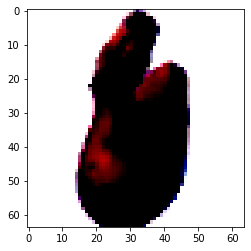

In [40]:
img, label = valid_ds[3005]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Corn Husk , Predicted: Corn Husk


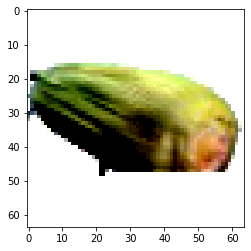

In [41]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Lemon , Predicted: Lemon


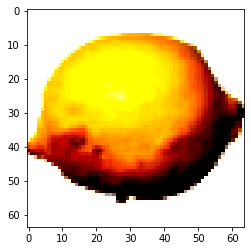

In [42]:
img, label = valid_ds[10053]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

## Summary and Further Work

Using this model, I can achieve over 99 percent accuracy, but to get that accuracy, I need to train the dataset for about 18 minutes and 8 epochs.

There are different type of techniques and models which can be use to overcomes the situation. The optmization of the model can be improve by tuning the learning rate, choosing the right optimizer function and different type of machine learning models.      

## Reference



1.   https://www.kaggle.com/moltean/fruits
2.   https://jovian.ai/aakashns/05b-cifar10-resnet



## Save and Commit

In [50]:
torch.save(model.state_dict(), 'fruits-360.pth')

In [68]:
!pip install jovian --upgrade --quiet

In [69]:
import jovian

In [ ]:
jovian.reset()
jovian.log_hyperparams(arch='fruits-360', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

In [70]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [72]:
jovian.commit(project=project_name, environment=None, outputs=['fruits-360.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/najmolanwar5/fruits-and-vegetable-classifaction


'https://jovian.ai/najmolanwar5/fruits-and-vegetable-classifaction'